In [1]:
# LOGISTIC REGRESSION

In [2]:
# confusion matrix------------->except linear it is ued in all models

In [3]:
500+310

810

In [4]:
500/810

0.6172839506172839

In [5]:
300+190

490

In [6]:
300/490

0.6122448979591837

In [7]:
7000+35

7035

In [8]:
7000+80+120+35

7235

In [9]:
7035/7235

0.972356599861783

In [10]:
6610+105

6715

In [11]:
6610+510+10+105

7235

In [12]:
6715/7235

0.9281271596406357

In [13]:
6610+10

6620

In [14]:
7000+80

7080

In [15]:
6610/6620

0.9984894259818731

In [16]:
7000/7080

0.9887005649717514

In [17]:
105*100/(10+105)

91.30434782608695

In [18]:
35*100/(80+35)

30.434782608695652

In [19]:
120*100/(120+7000)

1.6853932584269662

In [20]:
510*100/(510+6610) 

7.162921348314606

In [21]:
(9000+500)/(9000+500+1000+200)

0.8878504672897196

In [22]:
4000+1200

5200

In [23]:
9000+785

9785

In [24]:
100000+500

100500

In [25]:
785/9785

0.0802248339294839

In [26]:
5000/100500

0.04975124378109453

In [27]:
5000/100000 *100

5.0

In [28]:
30000/800*100

3750.0

In [29]:
3000+500

3500

In [30]:
600/1900

0.3157894736842105

In [31]:
500/1900

0.2631578947368421

In [32]:
300/1900

0.15789473684210525

In [33]:
2700/3500 #----->tpr 3rd model

0.7714285714285715

In [34]:
300/1900 #----->fpr 3rd model

0.15789473684210525

In [35]:
(1600+2700)/(1600+300+800+2700)

0.7962962962962963

In [36]:
(7400+300)/(7400+800+800+300)

0.8279569892473119

In [37]:
(6000+500)/(6000+500+2200+600)*100

69.89247311827957

In [38]:
300/(800+300)

0.2727272727272727

In [39]:
800/(7400+800)*100

9.75609756097561

In [40]:
500/(600+500)

0.45454545454545453

In [41]:
2200/(2200+6000)

0.2682926829268293

In [42]:
800+300

1100

In [43]:
7400+800

8200

In [44]:
6000+2200

8200

In [45]:
600+500

1100

## logistic regression

In [46]:
# we talk in term of probablity ---> range of prop is 0 to 1 ---> 0 means event not  occur 1 means event occur
# prob of class zero ---> q
# prob of class one ---> p
# p+q=1

In [47]:
# logistic regression
# ln(p/(1-p))
# this is equal to 
# ln(p/q) # p+q=1---> q=1-q

In [48]:
import numpy as np
p=.5
q=1-p
np.log(p/(1-p))

0.0

In [49]:
import numpy as np
p=.6
q=1-p
np.log(p/(1-p))

0.4054651081081642

In [50]:
import numpy as np
p=.9 # p will range upto 1 becoz p is prob 
q=1-p
np.log(p/(1-p))

2.1972245773362196

In [51]:
# we always calculate p value for class 1

In [52]:
# when p --->imcreasing or moving towards 1 ( from 0.5,0.6,0.6 )np.log(p/(1-p)) moves towards infinity
# when p --->decreaing or moving  towards 0 np.log(p/(1-p)) moves towards negative infinity

In [53]:
# if p value (prob for class 1) is less than .5 we say event 0 will occur
# if p value value is more than or equal to 0.5 event 1 is said to be occur

In [54]:
import pandas as pd

In [55]:
cr=pd.read_csv(r"D:\Imarticus Learning\DATASETS\CreditRisk.csv")

In [56]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
cr.isnull().sum()[cr.isnull().sum()>0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [58]:
cr=cr.drop(['Loan_ID'],axis=1)

In [59]:
cr.Gender.fillna("Male",inplace=True);
cr.Married.fillna("Yes",inplace=True);
cr.Dependents.fillna(cr.Dependents.mean(),inplace=True);
cr.Self_Employed.fillna("No",inplace=True);
cr.LoanAmount.fillna(cr.LoanAmount.mean(),inplace=True);
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(),inplace=True);
cr.Credit_History.fillna(0,inplace=True);

In [60]:
cr.isnull().sum()[cr.isnull().sum()>0]

Series([], dtype: int64)

In [61]:
cr.Gender.replace({"Male":0,"Female":1},inplace=True)
cr.Married.replace({"No":0,"Yes":1},inplace=True)
cr.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)
cr.Self_Employed.replace({"No":0,"Yes":1},inplace=True)
cr.Property_Area.replace({"Urban":2,"Rural":1,'Semiurban':0},inplace=True)
cr.Loan_Status.replace({"Y":1,"N":0},inplace=True)

In [62]:
cr.select_dtypes(include='object').columns

Index([], dtype='object')

In [63]:
cr.isnull().sum()[cr.isnull().sum()>0]

Series([], dtype: int64)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_cr , test_cr= train_test_split(cr,test_size=.2)

In [66]:
train_cr_x=train_cr.iloc[:,0:-1]
train_cr_y=train_cr.iloc[:,-1]

In [67]:
test_cr_x=test_cr.iloc[:,0:-1]
test_cr_y=test_cr.iloc[:,-1]

In [68]:
27/(27+21)

0.5625

In [69]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_cr_x,train_cr_y)

LogisticRegression()

In [70]:
pred_test=logreg.predict(test_cr_x)


In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
tab1=confusion_matrix(test_cr_y,pred_test)

In [73]:
tab1

array([[ 34,  21],
       [ 18, 124]], dtype=int64)

In [74]:
acc=tab1.diagonal().sum()*100/tab1.sum()

In [75]:
acc

80.20304568527919

In [81]:
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score

In [82]:
precision_score(test_cr_y,pred_test)

0.8551724137931035

In [83]:
recall_score(test_cr_y,pred_test)

0.8732394366197183

In [84]:
f1_score(test_cr_y,pred_test)

0.8641114982578396

In [85]:
accuracy_score(test_cr_y,pred_test)

0.8020304568527918

In [90]:
pred_cr_test_prob=logreg.predict_proba(test_cr_x)

In [91]:
type(pred_cr_test_prob)

numpy.ndarray

In [93]:
pred_cr_test_prob.shape

(197, 2)

In [94]:
# auroc curve
from sklearn.metrics import roc_auc_score, roc_curve

In [95]:
roc_auc_score(test_cr_y,pred_cr_test_prob[:,1])
# area under the curve

0.820358514724712

In [97]:
fpr, tpr, threshold=roc_curve(test_cr_y,pred_cr_test_prob[:,1])

In [98]:
import matplotlib.pyplot as plt

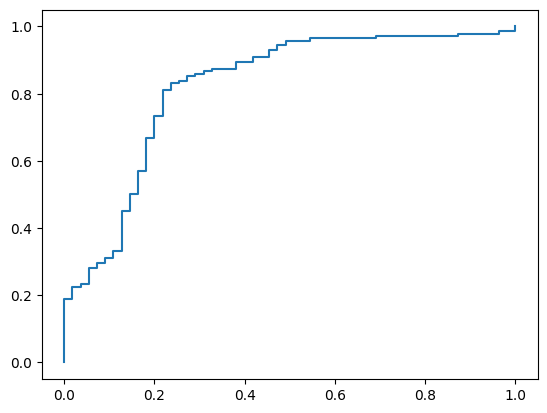

In [99]:
plt.plot(fpr,tpr)